# Importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset used for prototyping

All the following work must be adjusted to the correct data format, as well as converted to scripts for better handling.

In [120]:
dataset = pd.read_csv('Accounts_Payable.csv')

In [121]:
dataset.head()

,ObjectId,vendor_name,transaction_date,transaction_amount,organization_code,fund,fund_desc,department,department_desc,object_code,account_description
0,1,FIRE AND POLICE PENSION ASSN,2020/12/02 00:00:00,22332.52,110000,1100,General,0,NaN,205180,FPPA Death and Disablity
1,2,SMITH DAWSON & ANDREWS,2020/12/02 00:00:00,3333.33,11020055,1100,General,110,City Manager's Office,650795,Misc Consultant Services
2,3,INTERNATIONAL TOWN & GOWN ASSOCIATION,2020/12/02 00:00:00,400.00,12520035,1100,General,125,General Government,675095,Citywide Memberships
3,4,"YEAR ONE, INC",2020/12/02 00:00:00,5270.83,55520210,2500,Open Space,555,Open Space & Mountain Parks,670395,Misc Purchased Services
4,5,"YEAR ONE, INC",2020/12/02 00:00:00,12604.17,55520220,2500,Open Space,555,Open Space & Mountain Parks,670395,Misc Purchased Services


# Dataset adaptation

In [122]:
dataset.columns = ['rm','company_seller_name','doc_emission_date','total_value','rm1','rm2','rm3','rm4','tag','rm5','category']

In [123]:
from random import choice
tags = ['Jantar Natal 2020','Viagem BTB','Despesas Com1','Despesas Com2','','','','','']
dataset['tag'] = dataset['tag'].apply(lambda t: choice(tags))

In [124]:
dataset = dataset.sort_values('doc_emission_date')
dataset = dataset.reset_index(drop=True)
dataset.head()

,rm,company_seller_name,doc_emission_date,total_value,rm1,rm2,rm3,rm4,tag,rm5,category
0,261839,LARRY RODGERS DESIGN GROUP,2005/05/26 00:00:00,10000.0,51595030,3300,Permanent Parks & Recreation,515,Viagem BTB,650710,Architectural Consultants
1,261838,"QUALITY OF COLORADO, INC",2010/05/29 00:00:00,357.1,51523500,2180,.25 Cent Sales Tax,515,,670395,Misc Purchased Services
2,261837,"BRENNER, LEAH",2012/10/07 00:00:00,750.0,51010080,1100,General,510,Despesas Com2,670395,Misc Purchased Services
3,261836,ANDREWS FARWELL DITCH AND RESERVOIR COMPANY,2013/03/07 00:00:00,170.0,55520190,2500,Open Space,555,,670078,Water & Ditch Assmts: Other
4,261835,FARIS MACHINERY COMPANY,2013/06/30 00:00:00,260.1,61015080,6300,Stormwater & Flood Mgt Utility,610,Despesas Com1,660845,R&M: Vehicles


In [125]:
dataset = dataset.drop(['rm','rm2','rm3','rm4','rm5','rm1'], axis=1)
dataset.head()

,company_seller_name,doc_emission_date,total_value,tag,category
0,LARRY RODGERS DESIGN GROUP,2005/05/26 00:00:00,10000.0,Viagem BTB,Architectural Consultants
1,"QUALITY OF COLORADO, INC",2010/05/29 00:00:00,357.1,,Misc Purchased Services
2,"BRENNER, LEAH",2012/10/07 00:00:00,750.0,Despesas Com2,Misc Purchased Services
3,ANDREWS FARWELL DITCH AND RESERVOIR COMPANY,2013/03/07 00:00:00,170.0,,Water & Ditch Assmts: Other
4,FARIS MACHINERY COMPANY,2013/06/30 00:00:00,260.1,Despesas Com1,R&M: Vehicles


In [126]:
doc_id_template = "FT {:06d}"

i = 0
for index, row in dataset.iterrows():
    dataset.at[index,'id_document'] = doc_id_template.format(i)
    i += 1
dataset.tail()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document
261929,GOLD STAR CONCRETE INC,2020/12/02 00:00:00,36350.50,,Retainage Payable,FT 261929
261930,AMERICAN CONSERVATION EXPERIENCE,2020/12/02 00:00:00,51328.55,,Misc Purchased Services,FT 261930
261931,"HYDROLOGIK, LLC",2020/12/02 00:00:00,54.00,,Cellular Phone Service,FT 261931
261932,LAWRENCE CONSTRUCTION COMPANY,2020/12/02 00:00:00,114158.01,,Retainage Payable,FT 261932
261933,FIRE AND POLICE PENSION ASSN,2020/12/02 00:00:00,22332.52,,FPPA Death and Disablity,FT 261933


In [127]:
dataset['doc_emission_date'] = pd.to_datetime(dataset.doc_emission_date)

In [128]:
dataset.to_csv('accounts_payable_v2_complete_adapted.csv', index=False)

## Recomendation System

In [80]:
dataset = pd.read_csv('accounts_payable_2020_adapted.csv')
dataset.head()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document
0,PARKS & GARDENS LLC,2020-01-01,11665.30,Despesas Com1,Misc Purchased Services,FT 20/000000
1,ALLIANCE FOR WATER EFFICIENCY,2020-01-01,1000.00,NaN,"Empl Dues, Mbr, Lic, and Certs",FT 20/000001
2,TWA INC,2020-01-01,11525.00,Despesas Com1,R&M: Mowing and Landscaping,FT 20/000002
3,"ONLINE COMPUTER LIBRARY CENTER, INC",2020-01-01,248.43,NaN,Lib:ILL,FT 20/000003
4,"SESAC RIGHTS MANAGEMENT, INC.",2020-01-01,498.66,NaN,Misc Rentals & Leases,FT 20/000004


In [102]:
dataset['doc_emission_date'] = pd.to_datetime(dataset.doc_emission_date)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24436 entries, 0 to 24435
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_seller_name  24436 non-null  object        
 1   doc_emission_date    24436 non-null  datetime64[ns]
 2   total_value          24436 non-null  float64       
 3   tag                  10876 non-null  object        
 4   category             24436 non-null  object        
 5   id_document          24436 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB


In [103]:
dataset_mod = dataset.copy()
dataset_mod['company_seller_name_cat'] = pd.factorize(dataset_mod.company_seller_name)[0]
dataset_mod['company_seller_name_cat'] = dataset_mod['company_seller_name_cat'].astype("category")

dataset_mod['category_cat'] = pd.factorize(dataset_mod.category)[0]
dataset_mod['category_cat'] = dataset_mod['category_cat'].astype("category")

dataset_mod.head()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document,company_seller_name_cat,category_cat
0,PARKS & GARDENS LLC,2020-01-01,11665.30,Despesas Com1,Misc Purchased Services,FT 20/000000,0,0
1,ALLIANCE FOR WATER EFFICIENCY,2020-01-01,1000.00,NaN,"Empl Dues, Mbr, Lic, and Certs",FT 20/000001,1,1
2,TWA INC,2020-01-01,11525.00,Despesas Com1,R&M: Mowing and Landscaping,FT 20/000002,2,2
3,"ONLINE COMPUTER LIBRARY CENTER, INC",2020-01-01,248.43,NaN,Lib:ILL,FT 20/000003,3,3
4,"SESAC RIGHTS MANAGEMENT, INC.",2020-01-01,498.66,NaN,Misc Rentals & Leases,FT 20/000004,4,4


In [104]:
dataset_mod['doc_emission_date'] = dataset_mod['doc_emission_date'].dt.strftime('%Y%m%d')
dataset_mod.head()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document,company_seller_name_cat,category_cat
0,PARKS & GARDENS LLC,20200101,11665.30,Despesas Com1,Misc Purchased Services,FT 20/000000,0,0
1,ALLIANCE FOR WATER EFFICIENCY,20200101,1000.00,NaN,"Empl Dues, Mbr, Lic, and Certs",FT 20/000001,1,1
2,TWA INC,20200101,11525.00,Despesas Com1,R&M: Mowing and Landscaping,FT 20/000002,2,2
3,"ONLINE COMPUTER LIBRARY CENTER, INC",20200101,248.43,NaN,Lib:ILL,FT 20/000003,3,3
4,"SESAC RIGHTS MANAGEMENT, INC.",20200101,498.66,NaN,Misc Rentals & Leases,FT 20/000004,4,4


In [116]:
len(dataset_mod['category_cat'].unique())

216

In [105]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1, weights='distance')
model.fit(dataset_mod[['company_seller_name_cat','doc_emission_date','total_value']], dataset_mod['category_cat'])

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [114]:
x = ['4','20200101',498.66]
model.predict([x])

/home/samboi/Documents/repos/ml-data-analytics/env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/home/samboi/Documents/repos/ml-data-analytics/env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


array([4])

In [57]:
from keras.layers import Dense,Flatten
from keas.model import Sequential

model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(216, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Predictions

In [69]:
dataset19 = pd.read_csv('accounts_payable_2019_adapted.csv')
dataset19.tail()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document
43127,FRONTIER ENVIRONMENTAL SERVICES LLC,2019-12-31,115830.00,NaN,R&M: Miscellaneous,FT 19/043127
43128,"ATEN DESIGN GROUP, INC",2019-12-31,15795.00,NaN,IT Consultants,FT 19/043128
43129,FLATIRON LAUNDRY SERVICES LLC,2019-12-31,1079.05,NaN,Misc Purchased Services,FT 19/043129
43130,"WISS, JANNEY, ELSTNER ASSOCIATES, INC",2019-12-31,2700.00,NaN,Capital: Infrastructure,FT 19/043130
43131,UTILITY NOTIFICATION CENTER,2019-12-31,132.06,Despesas Com1,R&M: Miscellaneous,FT 19/043131


In [82]:
dataset20 = pd.read_csv('accounts_payable_2020_adapted.csv')
dataset20.tail()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document
24431,KEENE CONCRETE INC,2020-10-21,5549.51,NaN,Retainage Payable,FT 20/024431
24432,KEENE CONCRETE INC,2020-10-21,327.50,Viagem BTB,Retainage Payable,FT 20/024432
24433,KEENE CONCRETE INC,2020-10-21,4766.58,NaN,Retainage Payable,FT 20/024433
24434,ANDALE CONSTRUCTION INC,2020-10-21,6012.21,Viagem BTB,Retainage Payable,FT 20/024434
24435,"AMERESCO, INC.",2020-10-21,32433.99,Jantar Natal 2020,Retainage Payable,FT 20/024435


In [71]:
dataset = pd.concat([dataset19,dataset20])
dataset.iloc[43132]

company_seller_name        PARKS & GARDENS LLC
doc_emission_date                   2020-01-01
total_value                            11665.3
tag                              Despesas Com1
category               Misc Purchased Services
id_document                       FT 20/000000
Name: 0, dtype: object

In [2]:
dataset = pd.read_csv('accounts_payable_v2_complete_adapted.csv')
dataset.head()

,company_seller_name,doc_emission_date,total_value,tag,category,id_document
0,LARRY RODGERS DESIGN GROUP,2005-05-26,10000.0,Viagem BTB,Architectural Consultants,FT 000000
1,"QUALITY OF COLORADO, INC",2010-05-29,357.1,NaN,Misc Purchased Services,FT 000001
2,"BRENNER, LEAH",2012-10-07,750.0,Despesas Com2,Misc Purchased Services,FT 000002
3,ANDREWS FARWELL DITCH AND RESERVOIR COMPANY,2013-03-07,170.0,NaN,Water & Ditch Assmts: Other,FT 000003
4,FARIS MACHINERY COMPANY,2013-06-30,260.1,Despesas Com1,R&M: Vehicles,FT 000004


In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [63]:
def run_prophet(data, resample='D', mode='additive'):
    pr_data = dataset[['doc_emission_date','total_value']]
    pr_data.columns = ['ds','y']
    pr_data['ds'] = pd.to_datetime(pr_data['ds'])

    pr_data = pr_data.set_index('ds')
    pr_data = pr_data.resample(resample).sum().fillna(0)
    pr_data = pr_data.reset_index()
    pr_data['y'] = pr_data['y'] / 1000
    
    model = Prophet(seasonality_mode=mode, weekly_seasonality=True)
    
    return model, pr_data

In [7]:
tmp_data = dataset[['doc_emission_date','category','total_value']]
tmp_data['doc_emission_date'] = pd.to_datetime(tmp_data['doc_emission_date'])
tmp_data = pd.DataFrame(tmp_data.groupby([pd.Grouper(key="doc_emission_date", freq='D')])['total_value'].sum())
tmp_data = tmp_data.reset_index()
tmp_data.head()

<ipython-input-7-20faf1a47ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data['doc_emission_date'] = pd.to_datetime(tmp_data['doc_emission_date'])


,doc_emission_date,total_value
0,2005-05-26,10000.0
1,2005-05-27,0.0
2,2005-05-28,0.0
3,2005-05-29,0.0
4,2005-05-30,0.0


In [110]:
data_used.tail()

,ds,y
17,2020-06-30,17747.01642
18,2020-07-31,17935.97640
19,2020-08-31,19706.13667
20,2020-09-30,19170.24073
21,2020-10-31,9587.75389


<ipython-input-148-896492a2b864>:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('ds','y',data=data_used, color='green')


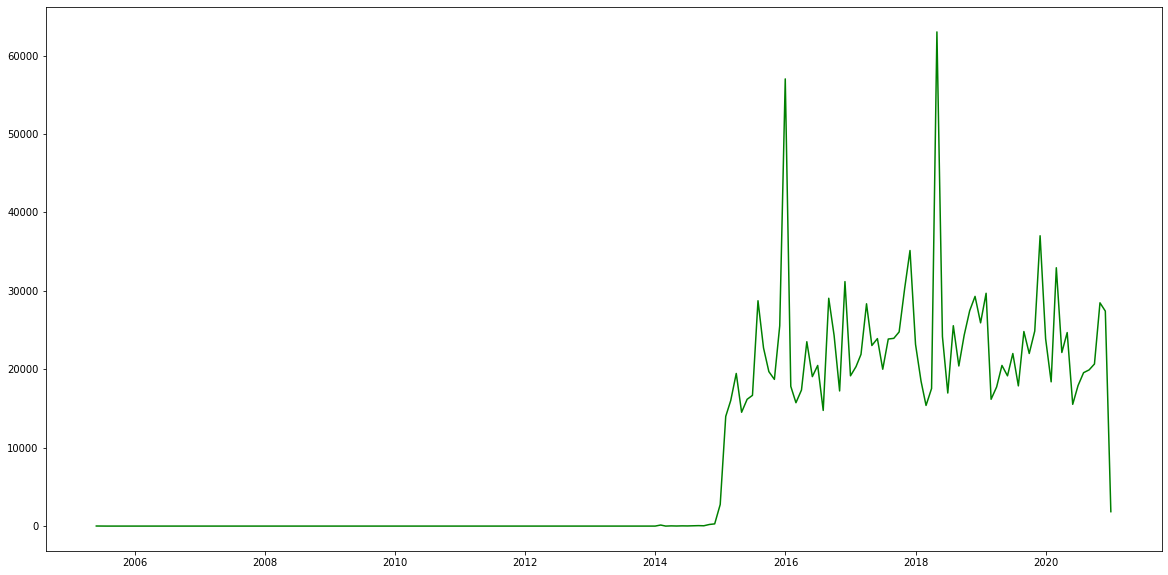

In [148]:
plt.figure(figsize=(20,10))
plt.plot('ds','y',data=data_used, color='green')

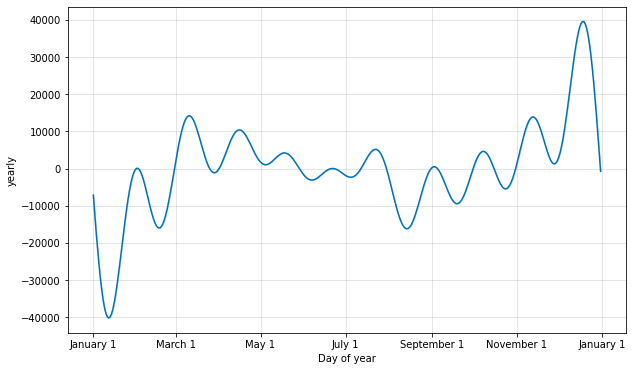

In [145]:
from fbprophet.plot import plot_yearly

a = plot_yearly(model)

In [91]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-31,23848.453105,16594.150916,31432.970617,23848.453105,23848.453105,0.0,0.0,0.0,0.0,0.0,0.0,23848.453105
1,2019-02-28,23642.680632,16629.669714,30844.974823,23642.680632,23642.680632,0.0,0.0,0.0,0.0,0.0,0.0,23642.680632
2,2019-03-31,23414.861109,16292.835965,30730.510904,23414.861109,23414.861109,0.0,0.0,0.0,0.0,0.0,0.0,23414.861109
3,2019-04-30,23194.390602,15793.800500,29690.482292,23194.390602,23194.390602,0.0,0.0,0.0,0.0,0.0,0.0,23194.390602
4,2019-05-31,22966.571078,15593.683181,30790.923351,22966.571078,22966.571078,0.0,0.0,0.0,0.0,0.0,0.0,22966.571078


In [86]:
future.tail()

,ds
447,2021-12-31
448,2022-01-01
449,2022-01-02
450,2022-01-03
451,2022-01-04


<ipython-input-63-9fbe25707277>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_data['ds'] = pd.to_datetime(pr_data['ds'])
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


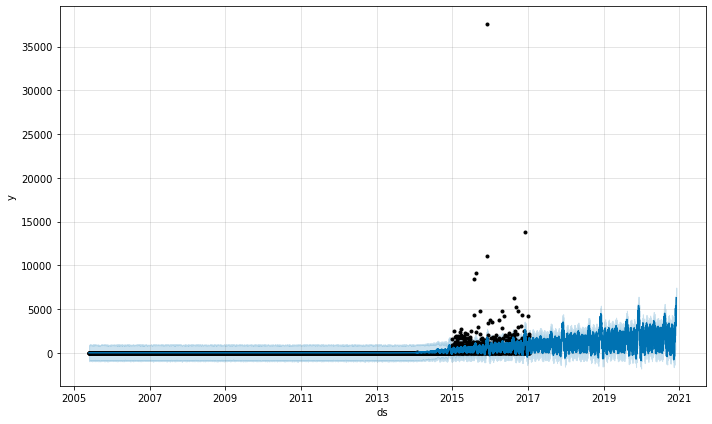

In [69]:
model, data_used = run_prophet(tmp_data, resample='D', mode='multiplicative')

len_train = round(data_used.shape[0] * 0.75)
len_test = len(data_used) - len_train
train = data_used[:len_train]
test = data_used[len_train:]


model.fit(train)

future = model.make_future_dataframe(periods=len_test)
forecast = model.predict(future)
fig1 = model.plot(forecast)

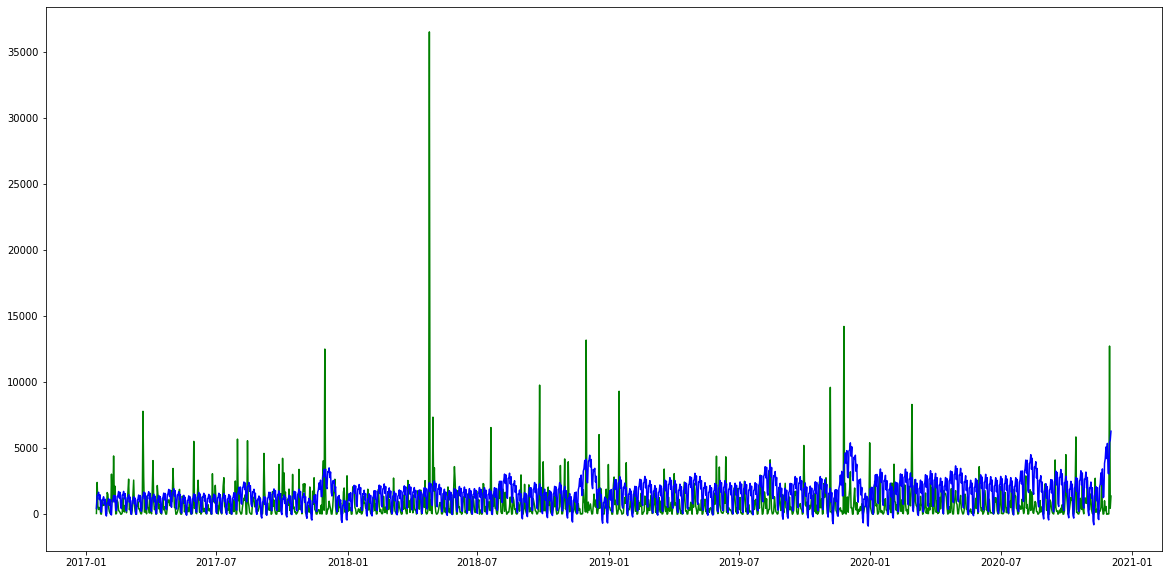

In [70]:
plt.figure(figsize=(20,10))
plt.plot(test['ds'], test['y'], color='green')
plt.plot(forecast[len_train:]['ds'], forecast[len_train:]['yhat'], color='blue')

/home/samboi/Documents/repos/ml-data-analytics/env/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/samboi/Documents/repos/ml-data-analytics/env/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


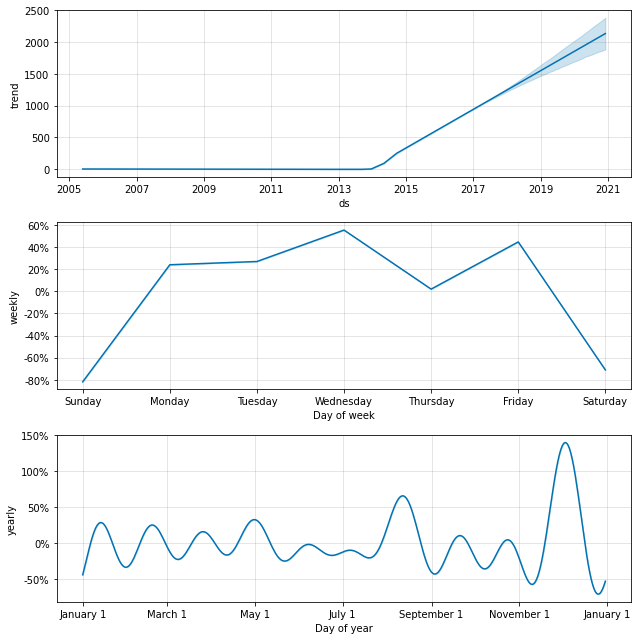

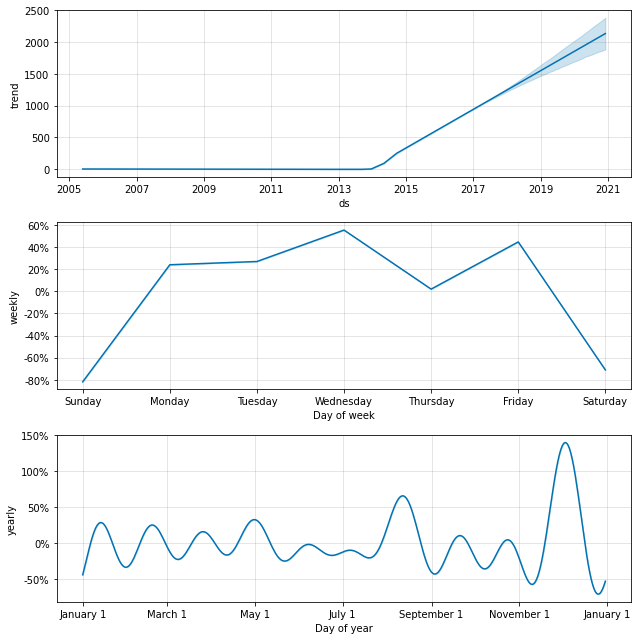

In [72]:
model.plot_components(forecast)

In [60]:
forecast[len_train:]['yhat']

4252     916.741452
4253    1049.265955
4254    1049.544254
4255    1082.117222
4256    1018.587191
           ...     
5665    2331.339542
5666    2335.050494
5667    2478.925570
5668    2489.127578
5669    2529.877198
Name: yhat, Length: 1418, dtype: float64

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 4252 to 5669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1418 non-null   datetime64[ns]
 1   y       1418 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.3 KB


# Adjust data per Semester

## Monthly Adjusted

In [ ]:
#%%timeit

from datetime import datetime

dataset_monthly = dataset

for i, row in dataset_monthly.iterrows():
    ifor_val = datetime.strptime(row['transaction_date'], '%m/%d/%Y').month
    dataset_monthly.at[i,'month'] = ifor_val

dataset_monthly.head()

In [ ]:
#%%timeit

dataset_monthly = dataset
dataset_monthly['month'] = dataset_monthly.apply(lambda row: datetime.strptime(row['transaction_date'], '%m/%d/%Y').month, axis=1)
dataset_monthly.head()

In [101]:
#%%timeit
# More efficient way

dataset_monthly = dataset.copy()
dataset_monthly['month'] = pd.to_datetime(dataset_monthly.transaction_date)
dataset_monthly['month'] = dataset_monthly['month'].dt.strftime('%-m')
dataset_monthly.head()

,vendor_name,transaction_date,transaction_amount,nif,fund,fund_desc,department,department_desc,object_code,account_description,invoice_number,month,biannual_period
0,JANE KENNEDY,10/07/2020,78.88,51523032,2300,Recreation Activity,515,Parks and Recreation,710500,Business Travel,1000,10,1
1,PAMELA AUBRY,05/07/2020,41.40,13510010,1100,General,135,Municipal Court,710500,Business Travel,1001,5,0
2,DAVID SUTHERLAND,04/15/2020,88.55,55520270,2500,Open Space,555,Open Space & Mountain Parks,710500,Business Travel,1002,4,0
3,JAMES C. BISH JR,02/19/2020,111.09,38020010,2120,Planning and Development Svc,380,PW-Development,710515,Empl Training,1003,2,0
4,JACOB ALBERT JACOBS,02/05/2020,852.60,51523020,2300,Recreation Activity,515,Parks and Recreation,710515,Empl Training,1004,2,0


## Biannual Adjusted

May require more work, depending **if the biannual starts at different timings than the default and presumed** January 1st and July 1st.

In [85]:
dataset_biannual = dataset.copy()
dataset_biannual['biannual_period'] = pd.to_datetime(dataset_biannual.transaction_date)
dataset_biannual['biannual_period'] = dataset_biannual['biannual_period'].dt.strftime('%-m')
dataset_biannual['biannual_period'] = dataset_biannual.apply(lambda row: 0 if int(row['biannual_period']) <= 5 else 1, axis=1)
dataset_biannual.tail()

,vendor_name,transaction_date,transaction_amount,nif,fund,fund_desc,department,department_desc,object_code,account_description,invoice_number,month,biannual_period
24431,FOOD TAX REBATE,09/24/2020,87.0,110000,1100,General,0,NaN,401130,Food Tax Refunds,25431,9,1
24432,FOOD TAX REBATE,09/28/2020,2456.0,110000,1100,General,0,NaN,401130,Food Tax Refunds,25432,9,1
24433,FOOD TAX REBATE,09/29/2020,526.0,110000,1100,General,0,NaN,401130,Food Tax Refunds,25433,9,1
24434,FOOD TAX REBATE,10/01/2020,2713.0,110000,1100,General,0,NaN,401130,Food Tax Refunds,25434,10,1
24435,FOOD TAX REBATE,10/05/2020,1313.0,110000,1100,General,0,NaN,401130,Food Tax Refunds,25435,10,1


## Quartely Adjusted

Same rule as before applies. If the timelines are different than the standard, the conditions must be updated.

In [ ]:
def quaterly_adjust(row):
  m = int(row['quarterly_period'])
  if m <= 2:
    return 0
  elif m <= 5:
    return 1
  elif m <= 8:
    return 2
  else:
    return 3
  
dataset_quarterly = dataset.copy()
dataset_quarterly['quarterly_period'] = pd.to_datetime(dataset_quarterly.transaction_date)
dataset_quarterly['quarterly_period'] = dataset_quarterly['quarterly_period'].dt.strftime('%-m')
dataset_quarterly['quarterly_period'] = dataset_quarterly.apply(quaterly_adjust, axis=1)
dataset_quarterly.head()

## Yearly Adjusted

Depends on previous data, we must think first what we want to display.

# Show sector more/less profitable

In [17]:
#Show sector more/less profitable
## More profitable
print(len(dataset['department_desc'].unique().tolist()))
print(len(dataset['department'].unique().tolist()))

29
29


In [ ]:
tmp = dataset[['department_desc','transaction_amount']]
tmp = tmp.fillna('Other')
tmp

In [ ]:
tmp = tmp.groupby('department_desc').sum()
tmp.sort_values(by='transaction_amount', ascending=False)

# Earnings, Costs, Profits, Losses

In [110]:
earnings = dataset[dataset['transaction_amount'] > 0]['transaction_amount'].sum()
costs = dataset[dataset['transaction_amount'] < 0]['transaction_amount'].sum()

profits_losses = earnings - costs
print(earnings, costs, profits, sep=' , ')

197816147.59999996 , -176434.49999999997 , 197992582.09999996


# Proportion of Sectors of action

In [ ]:
dataset['fund_desc'].unique()

In [126]:
tmp = dataset[['transaction_amount','fund_desc']]
tmp = tmp.groupby('fund_desc').count()
tmp.columns = ['n_invoices']
tmp.head()
#tmp.plot.pie(y='n_invoices', autopct="%.1f%%");

,n_invoices
fund_desc,
.25 Cent Sales Tax,1206
2011 Capital Improvement Bond,5
Affordable Housing,124
Airport,139
BMPA Debt Service,1


# Top Clients

In [136]:
tmp = dataset[['vendor_name','nif']]
tmp = tmp.groupby('vendor_name').count()
tmp.columns = ['n_invoices']
tmp = tmp.sort_values(by='n_invoices', ascending=False)
tmp.head()

,n_invoices
vendor_name,
PCARD ONETIME VENDOR,2848
XCEL ENERGY,892
MCGUCKIN HARDWARE,722
HOME DEPOT USA INC,619
CENTURYLINK,355
